In [19]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Local application imports
from utils import fetch_api_data, load_config, write_to_csv

In [20]:
# Load configuration from a JSON file
config = load_config('config.json')

In [21]:
# Retrieve the database credentials from the configuration
mongodb_user = config.get('mongodb_cluster', {}).get('user')
mongodb_pswd = config.get('mongodb_cluster', {}).get('password')
mongodb_srvr = config.get('mongodb_cluster', {}).get('server')

# Check if the API key was found in the configuration
if not mongodb_user or not mongodb_pswd:
    print("MongoDB credentials not found in the configuration file.")
    sys.exit()  # Exit the script if the key is missing

In [22]:
mongo_uri = f"mongodb+srv://{mongodb_user}:{mongodb_pswd}@{mongodb_srvr}/"

In [23]:
# Create an instance of MongoClient
mongo = MongoClient(mongo_uri)

# assign the met database to a variable name
db = mongo['crowdfunding_db']

# assign the collection to a variable
campaign = db['campaign']


In [24]:
# Move the campaign data to DF
query = {}
results = list(campaign.find(query))
pprint(results[1:5])
print(len(results))


[{'_id': ObjectId('66ea07fbf3a1d444a21fc151'),
  'backers_count': 158,
  'category_id': 'cat2',
  'cf_id': 1621,
  'company_name': 'Odom Inc',
  'contact_id': 3765,
  'country': 'US',
  'currency': 'USD',
  'description': 'Managed bottom-line architecture',
  'end_date': '2021-05-25',
  'goal': 1400.0,
  'launch_date': '2021-01-25',
  'outcome': 'successful',
  'pledged': 14560.0,
  'subcategory_id': 'subcat2'},
 {'_id': ObjectId('66ea07fbf3a1d444a21fc152'),
  'backers_count': 24,
  'category_id': 'cat2',
  'cf_id': 2156,
  'company_name': 'Mcdonald, Gonzalez and Ross',
  'contact_id': 4941,
  'country': 'US',
  'currency': 'USD',
  'description': 'Vision-oriented fresh-thinking conglomeration',
  'end_date': '2022-01-17',
  'goal': 4200.0,
  'launch_date': '2021-10-21',
  'outcome': 'failed',
  'pledged': 2477.0,
  'subcategory_id': 'subcat2'},
 {'_id': ObjectId('66ea07fbf3a1d444a21fc153'),
  'backers_count': 1425,
  'category_id': 'cat3',
  'cf_id': 1812,
  'company_name': 'Melton, R

In [25]:
all_campaign = pd.DataFrame(results)
all_campaign.head(4)


,_id,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,66ea07fbf3a1d444a21fc150,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,66ea07fbf3a1d444a21fc151,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,66ea07fbf3a1d444a21fc152,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
3,66ea07fbf3a1d444a21fc153,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3


In [26]:
# Move the category data to DF
category = db['category']
query = {}
results = list(category.find(query))
pprint(results[1:5])
print(len(results))


[{'_id': ObjectId('66ea07fa92bd2d08a78ecb55'),
  'category': 'technology',
  'category_id': 'cat3'},
 {'_id': ObjectId('66ea07fa92bd2d08a78ecb56'),
  'category': 'theater',
  'category_id': 'cat4'},
 {'_id': ObjectId('66ea07fa92bd2d08a78ecb57'),
  'category': 'film & video',
  'category_id': 'cat5'},
 {'_id': ObjectId('66ea07fa92bd2d08a78ecb58'),
  'category': 'publishing',
  'category_id': 'cat6'}]
9


In [27]:
all_category = pd.DataFrame(results)
all_category.head(4)

,_id,category_id,category
0,66ea07fa92bd2d08a78ecb54,cat2,music
1,66ea07fa92bd2d08a78ecb55,cat3,technology
2,66ea07fa92bd2d08a78ecb56,cat4,theater
3,66ea07fa92bd2d08a78ecb57,cat5,film & video


In [31]:
# Move the category data to DF
subcategory = db['subcategory']
query = {}
results = list(subcategory.find(query))
pprint(results[1:5])
print(len(results))

[{'_id': ObjectId('66ea07f973a23348f4a2060c'),
  'subcategory': 'nonfiction',
  'subcategory_id': 'subcat10'},
 {'_id': ObjectId('66ea07f973a23348f4a2060d'),
  'subcategory': 'wearables',
  'subcategory_id': 'subcat9'},
 {'_id': ObjectId('66ea07f973a23348f4a2060e'),
  'subcategory': 'shorts',
  'subcategory_id': 'subcat13'},
 {'_id': ObjectId('66ea07f973a23348f4a2060f'),
  'subcategory': 'fiction',
  'subcategory_id': 'subcat14'}]
24


In [32]:
all_subcategory = pd.DataFrame(results)
all_subcategory.head(4)

,_id,subcategory_id,subcategory
0,66ea07f973a23348f4a2060b,subcat6,electric music
1,66ea07f973a23348f4a2060c,subcat10,nonfiction
2,66ea07f973a23348f4a2060d,subcat9,wearables
3,66ea07f973a23348f4a2060e,subcat13,shorts


In [33]:
# Group outcome by Category and Subcategory
# Merge campaign to Category
camp_cat_merged_df = all_campaign.merge(all_category, how='inner', on='category_id')
camp_cat_merged_df.head(3)

,_id_x,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,_id_y,category
0,66ea07fbf3a1d444a21fc150,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,66ea07fa92bd2d08a78ecb5c,food
1,66ea07fbf3a1d444a21fc151,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,66ea07fa92bd2d08a78ecb54,music
2,66ea07fbf3a1d444a21fc152,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,66ea07fa92bd2d08a78ecb54,music


In [34]:
camp_cat_grouped = camp_cat_merged_df.groupby(["outcome", "category"]).size().reset_index(name="count")
camp_cat_grouped

,outcome,category,count
0,canceled,film & video,11
1,canceled,food,4
2,canceled,games,1
3,canceled,music,10
4,canceled,photography,4
5,canceled,publishing,2
6,canceled,technology,2
7,canceled,theater,23
8,failed,film & video,60
9,failed,food,20


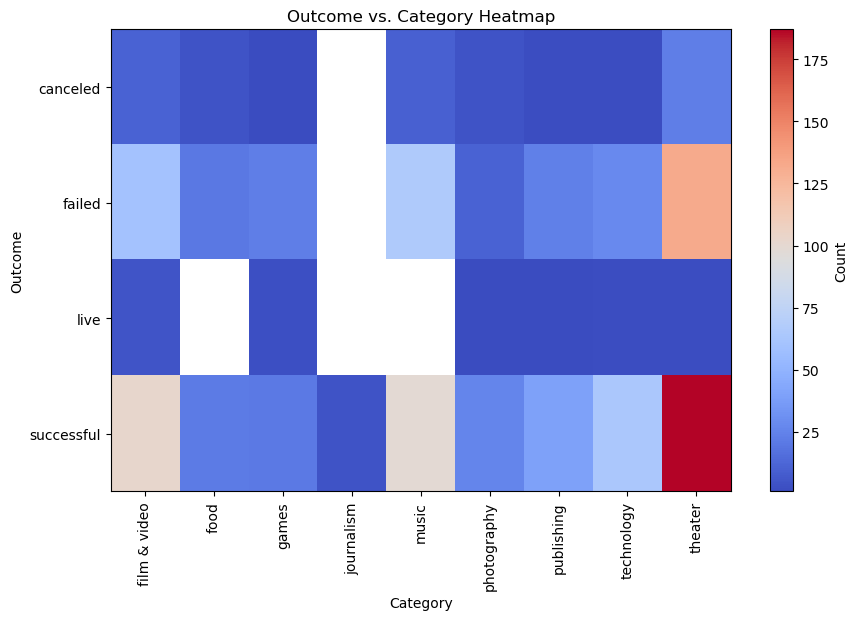

In [35]:
def createCategoryToOutcomeHeatMap():
    # Assuming camp_cat_grouped is your DataFrame
    pivot_df = camp_cat_grouped.pivot(index="outcome", columns="category", values="count")
    
    # Create the heatmap
    plt.figure(figsize=(10, 6))  # Set the size of the cauldron
    plt.imshow(pivot_df, cmap="coolwarm", aspect="auto", origin="upper")
    
    # Add some enchanting labels
    plt.title("Outcome vs. Category Heatmap")
    plt.xlabel("Category")
    plt.ylabel("Outcome")
    
    # Add a colorbar for extra magic
    plt.colorbar(label="Count")
    
    # Show the magic!
    plt.xticks(range(len(pivot_df.columns)), pivot_df.columns, rotation=90)  # Display category names
    plt.yticks(range(len(pivot_df.index)), pivot_df.index)
    plt.show()

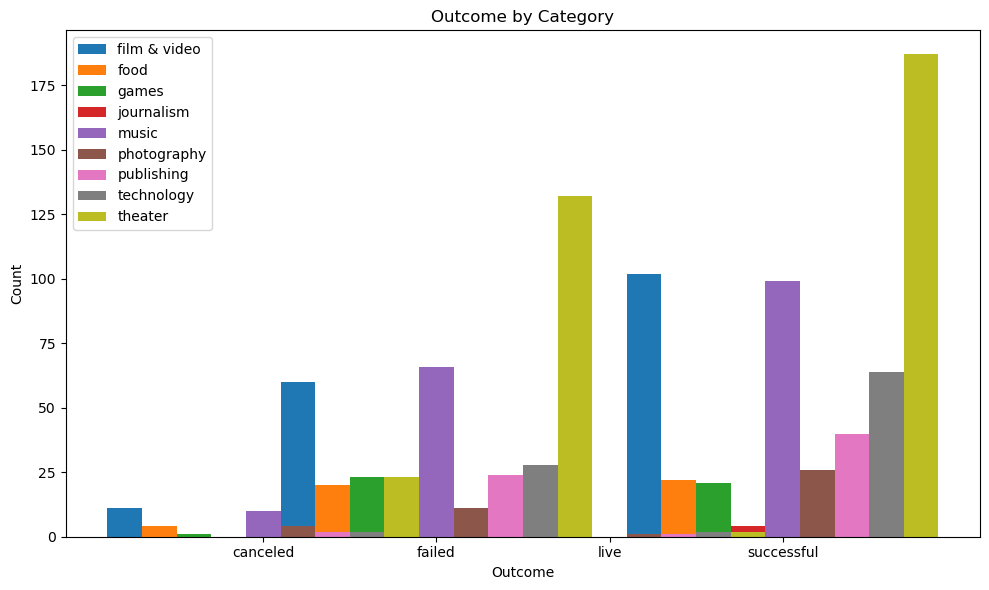

In [36]:
# Assuming camp_cat_grouped is your DataFrame
def createCategoryToOutcomeGroupBarGraph():
    pivot_df = camp_cat_grouped.pivot(index="outcome", columns="category", values="count")
    
    # Set the categories and outcomes
    categories = pivot_df.columns
    outcomes = pivot_df.index
    num_categories = len(categories)
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set the width of each bar
    bar_width = 0.2
    
    # Generate positions for bars
    x = np.arange(len(outcomes))
    
    # Create bars for each category
    for i, category in enumerate(categories):
        ax.bar(x + i * bar_width, pivot_df[category], width=bar_width, label=category)
    
    ax.set_title("Outcome by Category")
    ax.set_xlabel("Outcome")
    ax.set_ylabel("Count")
    ax.set_xticks(x + (num_categories - 1) * bar_width / 2)
    ax.set_xticklabels(outcomes)
    ax.legend(loc="upper left")
    
    plt.tight_layout()
    plt.show()

In [37]:
# Group outcome by Category and Subcategory
# Merge campaign to Category
camp_cat_subcat_merged_df = camp_cat_merged_df.merge(all_subcategory, how='inner', on='subcategory_id')
camp_cat_subcat_merged_df.head(3)


,_id_x,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,_id_y,category,_id,subcategory
0,66ea07fbf3a1d444a21fc150,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,66ea07fa92bd2d08a78ecb5c,food,66ea07f973a23348f4a2061b,food trucks
1,66ea07fbf3a1d444a21fc151,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,66ea07fa92bd2d08a78ecb54,music,66ea07f973a23348f4a2061f,rock
2,66ea07fbf3a1d444a21fc152,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,66ea07fa92bd2d08a78ecb54,music,66ea07f973a23348f4a2061f,rock


In [43]:
camp_sub_cat_grouped = camp_cat_subcat_merged_df.groupby(["outcome", "category","subcategory"]).size().reset_index(name="count")
camp_sub_cat_grouped

,outcome,category,subcategory,count
0,canceled,film & video,animation,1
1,canceled,film & video,documentary,4
2,canceled,film & video,drama,2
3,canceled,film & video,shorts,1
4,canceled,film & video,television,3
...,...,...,...,...
67,successful,publishing,radio & podcasts,4
68,successful,publishing,translations,14
69,successful,technology,wearables,28
70,successful,technology,web,36


In [44]:
def createSubCategoryToOutcomeHeatMap():
    # Assuming camp_cat_grouped is your DataFrame
    pivot_df = camp_sub_cat_grouped.pivot(index="outcome", columns="subcategory", values="count")
    
    # Create the heatmap
    plt.figure(figsize=(10, 6))  # Set the size of the cauldron
    plt.imshow(pivot_df, cmap="coolwarm", aspect="auto", origin="upper")
    
    # Add some enchanting labels
    plt.title("Outcome vs. Subcategory Heatmap")
    plt.xlabel("Subcategory")
    plt.ylabel("Outcome")
    
    # Add a colorbar for extra magic
    plt.colorbar(label="Count")
    
    # Show the magic!
    plt.xticks(range(len(pivot_df.columns)), pivot_df.columns, rotation=90)  # Display category names
    plt.yticks(range(len(pivot_df.index)), pivot_df.index)
    plt.show()

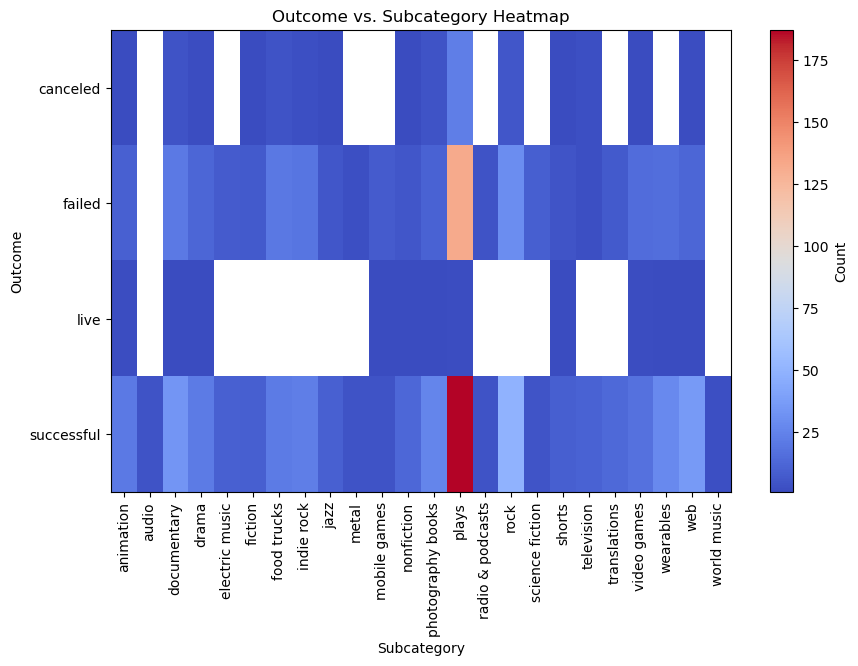

In [45]:
createSubCategoryToOutcomeHeatMap()